# Chicago Car Crashes Analysis of Contributing Factors

![Chicago](Images/Chicago.jpg)

## Business Understanding

**Overview:** The intent of this project is to build a classifier to predict the primary contributory cause of car accidents in Chicago, based on factors such as vehicle type, driver demographics, and road conditions. The findings of this analysis will help the City of Chicago understand continutors to accidents and assist with implimenting policies through the  Vehicle Safety Board that aim to reduce car accidents and increase the safety of Chicago residents. 

**Goal and Modeling:** The data used to created the predictive model is pulled from the City of Chicago's Transportations website in which we will be analyizing the following data points Crash, Vehicle and Driver information. 

* **Crash/Indident:**
    * Road Conditions
    * Crash Type
    * Weather Conditions
    * Lighting Conditions (Night, Daytime, Dusk ect..)
    * Time (Day of week, month, hour ect...) 
* **Vehicle Information:**
    * Make and Model
    * Vehicle Year
    * Vehicle Defect
    * Travel Direction
    * License Plate State
* **Driver Information:** 
    * Age/Sex
    * Driver vs Passenger
    * Safety Equipment
    * Injury
    * Blood Alcohol Levels

## Dataset Selection and Initial Data Exploration

In [ ]:
import pandas as pd
import numpy as np
# Load Accident Data
accident = pd.read_csv('Data/Traffic_Crashes.csv')

In [ ]:
# Load Vehicle Data
vehicle = pd.read_csv('Data/Traffic_Crashes_Vehicles.csv')

In [ ]:
# Load Driver Data
driver =pd.read_csv('Data/Traffic_Crashes_People.csv')

**Note about the driver data:** this is all people related to the accident including passengers. Since this makes will create duplicates we are going to filter the Driver data to just the person driving the vehicle and exlude passengers

In [ ]:
driver = driver[driver['SEAT_NO'] == 1]

### Data Exploration

1. Inspecting data for null values:  I did a quick   on each to understand the number of null values present in a column (meaning we can drop those)
2. Understanding Data Type of each column for categorical vs Numeric classification
3. Referencing City of Chicago definition of each field, what is means and whether it would be relevant information used for predicting models for crashes.


#### **Accidents** ####
* Number of Examples: 886,771 record accidents 
* Key Categorical Fields
    * WEATHER_CONDITION: Weather condition at time of crash, as determined by reporting officer
    * LIGHTING_CONDITION: Light condition at time of crash, as determined by reporting officer
    * ROADWAY_SURFACE_COND: Road surface condition, as determined by reporting officer
    * ROAD_DEFECT: Road defects, as determined by reporting officer
    * CRASH_TYPE: A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away
    * ALIGNMENT: Street alignment at crash location, as determined by reporting officer
* Key Numeric Field
    * POSTED_SPEED_LIMIT: Posted speed limit, as determined by reporting officer
    * INJURIES_TOTAL:Total persons sustaining fatal, incapacitating, non-incapacitating, and possible injuries as determined by the reporting officer
    * INJURIES_FATAL:Total persons sustaining fatal injuries in the crash
    * INJURIES_INCAPACITATING: Total persons sustaining incapacitating/serious injuries in the crash as determined by the reporting officer. Any injury other than fatal injury, which prevents the injured person from walking, driving, or normally continuing the activities they were capable of performing before the injury occurred. Includes severe lacerations, broken limbs, skull or chest injuries, and abdominal injuries.
    * INJURIES_NON_INCAPACITATING: Total persons sustaining non-incapacitating injuries in the crash as determined by the reporting officer. Any injury, other than fatal or incapacitating injury, which is evident to observers at the scene of the crash. Includes lump on head, abrasions, bruises, and minor lacerations.
    * INJURIES_REPORTED_NOT_EVIDENT: Total persons sustaining possible injuries in the crash as determined by the reporting officer. Includes momentary unconsciousness, claims of injuries not evident, limping, complaint of pain, nausea, and hysteria.
    * INJURIES_NO_INDICATION: Total persons sustaining no injuries in the crash as determined by the reporting officer
    * INJURIES_UNKNOWN: Total persons for whom injuries sustained, if any, are unknown              
* Columns Dropped due to high null count: 'CRASH_DATE_EST_I', 'LANE_CNT', 'REPORT_TYPE', 'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE','WORKERS_PRESENT_I', 'LATITUDE', 'LONGITUDE', 'LOCATION'

#### **Vehicle** ####
* Number of Examples: 1,808,946
* Key Categorical Fields:
    * MAKE: The make (brand) of the vehicle, if relevant
    * MODEL: The model of the vehicle, if relevant
    * VEHICLE_USE: The normal use of the vehicle, if relevant
    * TRAVEL_DIRECTION: The direction in which the unit was traveling prior to the crash, as determined by the reporting officer
* Key Numeric Field:
    * num_passengers: Number of passengers in the vehicle. The driver is not included. More information on passengers is in the People dataset.
    * OCCUPANT_CNT: The number of people in the unit, as determined by the reporting officer
    * VEHICLE_YEAR: The model year of the vehicle, if relevant
* Columns Dropped due to high null count: 'CMRC_VEH_I',  'LIC_PLATE_STATE', 'TOWED_I', 'FIRE_I', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY','TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I','AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I','AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I','FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO','COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE','CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO','HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO','MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I','MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I','TRAILER1_WIDTH', 'TRAILER2_WIDTH', 'TRAILER1_LENGTH','TRAILER2_LENGTH', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT', 'VEHICLE_CONFIG','CARGO_BODY_TYPE', 'LOAD_TYPE', 'HAZMAT_OUT_OF_SERVICE_I','MCS_OUT_OF_SERVICE_I', 'HAZMAT_CLASS'

#### **Driver** ####
* Number of Examples: 1,947,631
* Key Categorical Fields
    * PERSON_TYPE: Type of roadway user involved in crash
    * SEX: Gender of person involved in crash, as determined by reporting officer
    * DRIVER_ACTION: Driver action that contributed to the crash, as determined by reporting officer
    * DRIVER_VISION: What, if any, objects obscured the driver’s vision at time of crash
* Key Numeric Field
    * AGE: Age of person involved in crash
* Columns Dropped due to high null count: 'SEAT_NO', 'DRIVERS_LICENSE_CLASS', 'HOSPITAL', 'EMS_AGENCY','EMS_RUN_NO', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY','PEDPEDAL_LOCATION', 'BAC_RESULT VALUE', 'CELL_PHONE_USE'

#### **Key Joins to Map this Data together** ####    
* Accident: Main key is CRASH_RECORD_ID related to Vehicle and Driver
* Vehicle: Relates to Accident by CRASH_RECORD_ID 
* Driver: Relates to Accident by CRASH_RECORD_ID and Vehicle by VEHICLE_ID

In [ ]:
driver.info(null_counts=True)
driver.columns[driver.notnull().sum() < 1000000]

In [ ]:
#Inspecting Accidents Dataframe
accident.info()
accident.columns[accident.notnull().sum() < 884000]

In [ ]:
#Inspecting Vehicle Dataframe
# 1485460 is the number of non-null for vehicle year which we want to keep for our analysis, everything else can be dropped
vehicle.info(null_counts=True)

vehicle.columns[vehicle.notnull().sum() < 1485460]

In [ ]:
#Inspecting Driver Dataframe
driver.info(null_counts=True)

In [ ]:
# Create a list for each dataframe of columns to drop
accident_columns_to_drop = ['CRASH_DATE_EST_I', 'LANE_CNT', 'REPORT_TYPE', 'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE','WORKERS_PRESENT_I', 'LATITUDE', 'LONGITUDE', 'LOCATION']
vehicle_columns_to_drop = ['CMRC_VEH_I',  'LIC_PLATE_STATE', 'TOWED_I', 'FIRE_I', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY','TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I','AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I','AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I','FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO','COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE','CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO','HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO','MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I','MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I','TRAILER1_WIDTH', 'TRAILER2_WIDTH', 'TRAILER1_LENGTH','TRAILER2_LENGTH', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT', 'VEHICLE_CONFIG','CARGO_BODY_TYPE', 'LOAD_TYPE', 'HAZMAT_OUT_OF_SERVICE_I','MCS_OUT_OF_SERVICE_I', 'HAZMAT_CLASS']
driver_columns_to_drop = ['SEAT_NO', 'DRIVERS_LICENSE_CLASS', 'HOSPITAL', 'EMS_AGENCY','EMS_RUN_NO', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY','PEDPEDAL_LOCATION', 'BAC_RESULT VALUE', 'CELL_PHONE_USE']

# Drop irrelevant columns from each of the three dataframes
accident = accident.drop(columns=accident_columns_to_drop)
vehicle = vehicle.drop(columns=vehicle_columns_to_drop)
driver = driver.drop(columns=driver_columns_to_drop)



In [157]:
# Start joining the three dataframes together and inspect the data, fill catagorical with 'missing' and numerical with 0
accident_vehicle_df = accident.merge(vehicle, on='CRASH_RECORD_ID', how='inner')

# Step 2: Merge Driver DataFrame on 'CRASH_RECORD_ID' and 'VEHICLE_ID'
accident_final_df = accident_vehicle_df.merge(driver, on=['CRASH_RECORD_ID', 'VEHICLE_ID'], how='inner')

In [158]:
# accident_final_df.info(null_counts=True) 

accident_final_df[accident_final_df.duplicated(subset='CRASH_RECORD_ID', keep=False)]

,CRASH_RECORD_ID,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,AGE,DRIVERS_LICENSE_STATE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
108,6d31195868b1bbde5b5b770b7c54fced0cf1e4feba2f3b...,09/11/2018 04:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,NaN,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN
109,6d31195868b1bbde5b5b770b7c54fced0cf1e4feba2f3b...,09/11/2018 04:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,11.0,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN
140,9069e593ecac08e8e7cdda9b3902e595678f3907235079...,06/16/2022 03:20:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,...,43.0,NaN,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN
141,9069e593ecac08e8e7cdda9b3902e595678f3907235079...,06/16/2022 03:20:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,...,39.0,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN
162,a9c4b919acce3ea492d00fbd95090e39d24fb6296a6cf8...,10/24/2017 01:00:00 PM,25,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,NaN,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17642,ba3b057445eadac16ed17d713e219fde17690b2e4b3636...,06/24/2023 10:15:00 PM,30,STOP SIGN/FLASHER,UNKNOWN,RAIN,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,34.0,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,INCAPACITATING INJURY,NaN,NaN,NaN,NaN
17643,c39643588e342a701f99e5a8643ce6996a393e47634415...,07/28/2023 10:10:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,NaN,NaN,SAFETY BELT USED,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN
17644,c39643588e342a701f99e5a8643ce6996a393e47634415...,07/28/2023 10:10:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,NaN,NaN,SAFETY BELT USED,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN
17647,f5a43358a69e91f425007c5f5314ea17a599d267a1e5c6...,08/09/2023 12:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,30.0,NaN,USAGE UNKNOWN,NOT APPLICABLE,UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN


In [159]:
accident[accident['CRASH_RECORD_ID']=='23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7a1179c4a1c091442a6eeab8352220c7c56ca1ff7c4b4b0fc345c74e3e85ecb9d43deeb66b5f803d4a0']

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,...,3.0,0.0,1.0,2.0,0.0,2.0,0.0,19,3,9


 ## Data Preprocessing

In prepartion for training this data on a logistic regression and decision tree models, we're going to do the following to assure our categorical and numerical data does not have null values and can correctly predict 
1. Investigate data further and drop additional columns since data is joined or not relevant 
2. Fill null values for categorical columns and input 0 for numerical values  
3. Hot One encode 
4. Test Train Split

### Drop Columns not needed for model training and standarize target variable ###
* Extraxt year from the CRASH_DATE_x columns, normalize the year to a double digit variable based on the earliest year and drop CRASH_DATE_x. Since there is a crash day, month and day of week already available, all we need is the year since this data CRASH_DATE_x is redundent. 
* Scale the DAMAGE column to a scale based on the following
    * '500 OR LESS' = 1
    * '501 - 1,500' = 2
    * 'OVER 1,500' = 3
* Update target variable of INJURY_CLASSIFICATION to binary help us assess whether injuries occured or not, 1 meaning an injury occured and 0 showing no injury. 
    * NO INDICATION OF INJURY: 0
    * REPORTED, NOT EVIDENT: 1
    * NONINCAPACITATING INJURY: 1
    * INCAPACITATING INJURY: 1
    * FATAL: 1
    * Nan: 0
* Remove the following columns: either due to high null values still, redendent information or not relevant for model prediction
    * CRASH_RECORD_ID, CRASH_DATE, DAMAGE, INJURY_CLASSIFICATION, DRIVER_ACTION, DRIVER_VISION, PHYSICAL_CONDITION,BAC_RESULT, CRASH_TYPE, DATE_POLICE_NOTIFIED, STREET_NO,STREET_NAME, MOST_SEVERE_INJURY, CRASH_UNIT_ID, CRASH_DATE_y,VEHICLE_ID, PERSON_ID, CITY, STATE, CRASH_DATE_x   

In [160]:
accident_final_df['INJURY_CLASSIFICATION'].unique().tolist()

INJURY_CLASSIFICATION_mapping = {
    'NO INDICATION OF INJURY': 0,
    'REPORTED, NOT EVIDENT': 1,
    'NONINCAPACITATING INJURY': 1,
    'INCAPACITATING INJURY': 1,
    'FATAL': 1
}

# Create a new binary column by mapping the values and filling NaN with 0
accident_final_df['INJURY_CLASSIFICATION_BINARY'] = accident_final_df['INJURY_CLASSIFICATION'].map(INJURY_CLASSIFICATION_mapping).fillna(0).astype(int)

In [161]:
# Ensure the column is in datetime format
accident_final_df['CRASH_DATE'] = pd.to_datetime(accident_final_df['CRASH_DATE'])

# Extract the year and create a new column
accident_final_df['CRASH_YEAR'] = accident_final_df['CRASH_DATE'].dt.year

In [162]:
# Create a new column for choices DAMAGE and score it based on damage severity
# accident_final_df['DAMAGE'].unique().tolist()
conditions = [
    (accident_final_df['DAMAGE'] == '$500 OR LESS'),
    (accident_final_df['DAMAGE'] == '$501 - $1,500'),
    (accident_final_df['DAMAGE'] == 'OVER $1,500')
]
choices = [1, 2, 3]
accident_final_df['DAMAGE_SCORE'] = np.select(conditions, choices)


In [163]:
accident_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17656 entries, 0 to 17655
Data columns (total 68 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CRASH_RECORD_ID                17656 non-null  object        
 1   CRASH_DATE_x                   17656 non-null  object        
 2   POSTED_SPEED_LIMIT             17656 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE         17656 non-null  object        
 4   DEVICE_CONDITION               17656 non-null  object        
 5   WEATHER_CONDITION              17656 non-null  object        
 6   LIGHTING_CONDITION             17656 non-null  object        
 7   FIRST_CRASH_TYPE               17656 non-null  object        
 8   TRAFFICWAY_TYPE                17656 non-null  object        
 9   ALIGNMENT                      17656 non-null  object        
 10  ROADWAY_SURFACE_COND           17656 non-null  object        
 11  ROAD_DEFECT    

In [164]:
# Median value for VEHICLE_YEAR, 
# Add 0 for SEX
# Adding missing as value for MODEL, SAFETY_EQUIPMENT,  AIRBAG_DEPLOYED, INJURY_CLASSIFICATION, 

In [165]:
# Drop the irrelvant columns 
# accident_final_df.drop(columns='DAMAGE')
additional_columns_to_drop = ['CRASH_RECORD_ID', 'CRASH_DATE', 'DAMAGE', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'BAC_RESULT', 'CRASH_TYPE', 'DATE_POLICE_NOTIFIED', 'STREET_NO', 'STREET_NAME', 'MOST_SEVERE_INJURY', 'CRASH_UNIT_ID', 'CRASH_DATE_y', 'VEHICLE_ID', 'PERSON_ID', 'CITY', 'STATE','CRASH_DATE_x']
accident_final_df =  accident_final_df.drop(columns=additional_columns_to_drop)

In [166]:
accident_final_df.head(5)

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION_BINARY,CRASH_YEAR,DAMAGE_SCORE
0,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,60632,F,46.0,NaN,NONE PRESENT,DID NOT DEPLOY,NONE,0,2023,3
1,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,60626,F,43.0,NaN,SAFETY BELT USED,NOT APPLICABLE,NONE,0,2023,2
2,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,FOUR WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,...,NaN,M,NaN,NaN,USAGE UNKNOWN,NOT APPLICABLE,NONE,0,2023,1
3,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NaN,M,NaN,NaN,SAFETY BELT NOT USED,NOT APPLICABLE,NONE,0,2023,1
4,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,...,60453,M,24.0,NaN,USAGE UNKNOWN,NOT APPLICABLE,NONE,0,2023,2


## Modeling ##

For modeling, we're going to use Logistic Regression as our baseline model since we are trying to predict a binary outcome of certain parameters highly correlate to the whether an injury occured from a car crash (INJURY_CLASSIFICATION_BINARY). For the second model, we will use Decision Trees to help us understand which parameters are the most important contributors to a car crash. Based on our initial findings, tunning and interations we will compare which model is the most accurate for predicting injuries attained in a crash and which variables are the highest contributing factors  

### Logistic Regression ###

**Reason:** Logistic regression is a great baseline model and computationally efficient. Since we have a larger dataset and a mixture of binary and multiclass parameters, we can efficiently process and train our dataset to understand which categories are not highly correlated and verify if we are under/overfitting, undersampling or have class imbalance. 

**Metrics and Analysis:** The metrics we're going to evaluate during this process are the following 

* Coefficients: understanding which parameters have a high positive/negative correlation whether a car accident results in a crash. For example, if TRAFFIC_CONTROL_DEVICE shows a strong negative correlation then this might direct policy and funding for Chicago to add more traffic control devices in the city.
* Classification Reporing: understanding how accurate the predictions are (accuracy), how often predicted true positives are correct (recall) and mean between precision/recall (F1-Score) which will help us understand if there is class imbalance in our dataset that we need to account for. 
* Confusion Matrix: we will use to verify how often our model correctly classify true positive/negatives against false positives/negatives. 

### Decision Tree ###
**Reason:**
Non-linear Relationships: Decision Trees handle non-linear interactions well, which is valuable in a dataset with mixed data types (categorical, numerical) and potentially complex interactions, like between WEATHER_CONDITION, DRIVER_ACTION, and INJURY_CLASSIFICATION.
Handling Missing Values and Outliers: Decision Trees are robust to missing values and outliers, which are often present in real-world datasets like crash data.
**Metrics and Analysis**
Feature Importance: Decision Trees provide an intrinsic measure of feature importance, which helps in identifying the most significant variables influencing the outcome (e.g., whether specific vehicle types or driver actions are risk factors).
Benefits:

Easy Interpretation: The tree structure provides a clear, visual representation of how decisions are made based on feature splits, making it easy to explain to non-technical stakeholders.
Flexible and Robust: Decision Trees can capture complex patterns and dependencies within the data without requiring extensive feature engineering or data scaling.
Summary of Using Both Models
Combining Logistic Regression and Decision Tree models offers a comprehensive approach. Logistic Regression provides a baseline and interpretability, helping identify linear relationships between features and the target variable. Decision Trees, on the other hand, offer robustness to non-linearity and provide insights into feature interactions, allowing for a more complex understanding of crash risk factors. These models complement each other, making them ideal choices for initial predictive analysis on this crash dataset. ​

In [177]:
# Import nessesary libraries needed for processing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [168]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(fill_value='missing')),
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_columns),
        ('cat', cat_transformer, categorical_columns)
    ]
)

In [169]:
# accident_final_df.columns
y = accident_final_df['INJURY_CLASSIFICATION_BINARY']
X = accident_final_df.drop('INJURY_CLASSIFICATION_BINARY', axis=1)

numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [172]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


#### Logistic Regression Modeling ####

In [179]:
# takes the numberical and categorical transformers and formats it accordingly based on the data types of the 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Pipeline is used to help process the steps and instantiante the loggistic regression model before we train our data
logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500,))
])

# Fit the model
logistic_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_logistic = logistic_model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3334
           1       0.77      0.62      0.69       198

    accuracy                           0.97      3532
   macro avg       0.88      0.81      0.84      3532
weighted avg       0.97      0.97      0.97      3532


Accuracy: 0.97


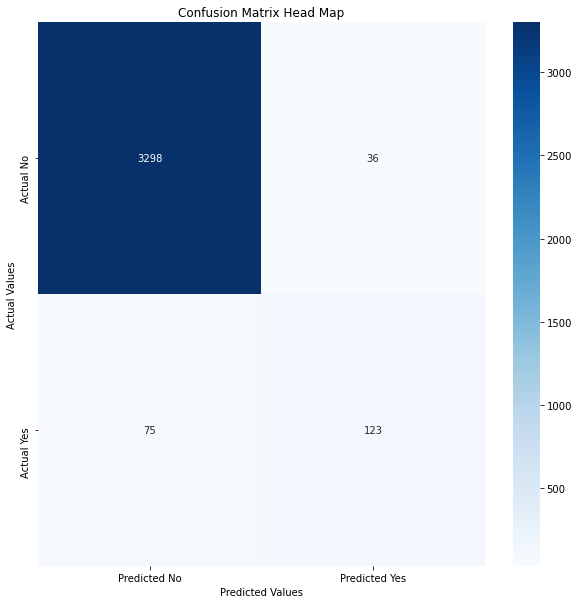

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

# Metric evaluation and tunning
# Classification report (Recall, F1, Precision)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))

# Accuracy
accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"\nAccuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)


plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix Heat Map")
plt.show()

#### Intial Observations from Logistic Regression ####

The accuracy of this model came out very high with a 97% accuracy but the largest problem I'm seeing with this initial data is there is a high class imbalance between non-injury crash accidents (3334 examples) vs injury crash accidents (198 examples) which is leading to a low precision, recall and F1 Score for injury crash accidents which is confirmed with the confusion matrix. 

**Next Steps**
Since the class imbalance is severe in this example, we are going to use the SMOTE (Synthetic Minority Over-sampling Technique) which will create additional data points for our undersampled class using K-nearest to create these additional data points and reduce our class imbalance. 


In [204]:
# import SMOTE
from imblearn.over_sampling import SMOTE

# Apply preprocessor to X since SMOTE would fail without encoding categorical variables
X_train_processed = preprocessor.fit_transform(X_train)

# instantiate SMOTE model and create a balanced training set of X and Y
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Since we had to preprocess our data prior to we need to create a new pipeline without the preprocessing step
logistic_model_smote = Pipeline(steps=[
    ('classifier', LogisticRegression(max_iter=500))
])

# Run LogisticRegression model on new SMOTE training data set
logistic_model_smote.fit(X_train_resampled, y_train_resampled)

# Do the same thing for the test data so we can run our evaluation metrics on the test and train data set with SMOTE applied
X_test_smote = preprocessor.transform(X_test)
y_pred_smote = logistic_model_smote.predict(X_test_processed)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3334
           1       0.65      0.92      0.76       198

    accuracy                           0.97      3532
   macro avg       0.82      0.94      0.87      3532
weighted avg       0.98      0.97      0.97      3532


Accuracy: 0.97


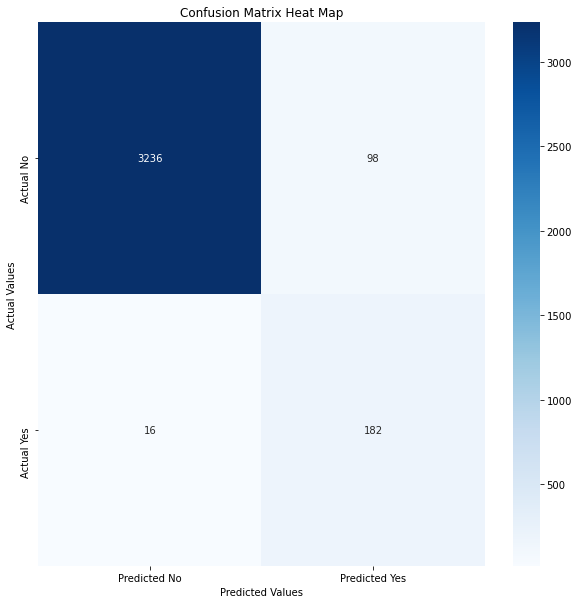

In [205]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote))

# Accuracy
accuracy = accuracy_score(y_test, y_pred_smote)
print(f"\nAccuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_smote)


plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix Heat Map")
plt.show()

#### Hyperparameter Tuning on Logistic Regression Model ####

Creating synthetic target data to reduce class imbalance (SMOTE) did improve our predictions F1-Score from 0.69 to 0.76 for the examples where people where injured during a car accident. Unforuntely, this was at the expense of precision which went from 0.77 to 0.65, prediction of positive classes decreased even though recall increased from 0.62 to 0.92. This is likely due to the class imbalance still represented even after SMOTE was applied. 

**GridSearchCV:** To tune the parameters of the model, we will tune the following parameters and use the ones that are best for our Logistic Regression models before looking at Decision Trees. 

* classifier__C: 
* classifier__penalty: 
* classifier__solver: 
* classifier__class_weight: similar to SMOTE, we are going to incorperate the

**Summary and Results:** Despite our effors to increase precision for the true positives it still remains relatively low at 64%, slightly better than a coin flip. The best model that was returned for Logistic Regression had the following parameters

* classifier__C: 1
* classifier__penalty: l2
* classifier__solver: liblinear
* classifier__class_weight: balanced

In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  # Regularization strength
    'classifier__penalty': ['l2'],  # Regularization type
    'classifier__solver': ['lbfgs', 'liblinear'],  # Solver
    'classifier__class_weight':['balanced'],  # Class weights
}

# getting a max_iter error when running logistic_model so we will increase that to 5000
logistic_model_v2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=5000,))
])


grid_search = GridSearchCV(logistic_model_v2, param_grid, scoring='f1', cv=5)

grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      3334
           1       0.64      0.95      0.76       198

    accuracy                           0.97      3532
   macro avg       0.82      0.96      0.87      3532
weighted avg       0.98      0.97      0.97      3532



#### Decision Tree ####

In [225]:
# Define the decision tree model pipeline
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

# Fit the pipeline to your training data
dt_model.fit(X_train, y_train)

# generate a prediction of the outcome from decision tree modeling
y_pred = dt_model.predict(X_test)

Accuracy: 0.9668742921857305
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3334
           1       0.67      0.79      0.73       198

    accuracy                           0.97      3532
   macro avg       0.83      0.89      0.86      3532
weighted avg       0.97      0.97      0.97      3532

Confusion Matrix:
[[3258   76]
 [  41  157]]
ROC-AUC Score: 0.8850669260087376


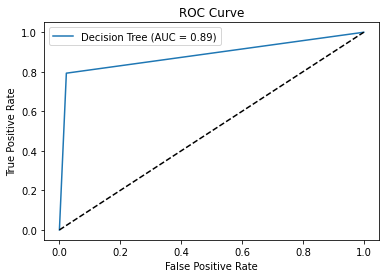

In [226]:
from sklearn.metrics import roc_auc_score, roc_curve

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC (only for binary classification)
if len(set(y_test)) == 2:
    y_proba = dt_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class
    roc_auc = roc_auc_score(y_test, y_proba)
    print("ROC-AUC Score:", roc_auc)

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label="Decision Tree (AUC = {:.2f})".format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="best")
    plt.show()

#### Intial Observations from Decision Tree ####

The overall accuracy is still relatively high with an accuracy of %96.91 but we are still seeing issues with the precision, recall and f1-score for the positive examples. The intial results are better than the best results from the Logistic Regression model which had a precision of 0.65 compared to 0.70. To start interating on the best results, we are going go to tune the decision tree models with GridSearchCV to see if we're able to find parameters that produce a more accurate result. 

**Comparison of Logistic Regression vs Decision Tree**

* Accuracy: %97 (best logistic regression) vs %96.91 (initial Decision Tree)
* Precision: 0.65 (best logistic regression) vs 0.70 (initial Decision Tree)
* Recall: 0.95 (best logistic regression) vs 0.79 (initial Decision Tree)
* F1: 0.76 (best logistic regression) vs 0.74 (initial Decision Tree)

#### Hyperparameter Tuning on Decision Tree Model ####

GridSearchCV: The initial model was relatively good compared to the best Logistic Regression model but we're going to tune and test the following parameters and validate if modifications to these results helps improve predictions on the positive results. 

* max_depth
* min_samples_split
* min_samples_leaf
* max_features
* criterion

In [227]:
param_grid_dt = {
    'classifier__max_depth': [None, 10, 20, 30, 40],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 5],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__criterion': ['gini', 'entropy']
}


In [234]:
grid_search = GridSearchCV(estimator=dt_model, 
                           param_grid=param_grid_dt, 
                           scoring='f1', 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=1)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Fitting 10 folds for each of 270 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  2.3min finished


Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 40, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best F1 Score: 0.5564233741740248


**Results:** Since hyperparameter tunning did not yield a increased F1 score, we are going to start to look at the columns of our dataset and cut out datapoints that are not highly correlated with predicting if an injury occured in an accident or not. We are going to use the feature selection library and cut out any 

**Best Parameters**
* classifier__criterion: gini 
* classifier__max_depth: 40
* classifier__max_features: auto 
* classifier__min_samples_leaf: 1
* classifier__min_samples_split: 2
* Best F1 Score: 0.5564233741740248

In [ ]:
from sklearn.feature_selection import RFE


dt_estimator = DecisionTreeClassifier(random_state=42, class_weight='balanced')
X_train_processed = preprocessor.fit_transform(X_train)


selector = RFE(dt_estimator, n_features_to_select=15, step=1)
selector = selector.fit(X_train_processed, y_train)

ranking = selector.ranking_

# Get a mask, True if feature was selected
selected_features_mask = selector.support_

# Print the names of the top selected features
selected_features = X_train.columns[selected_features_mask]
print("Selected Features:", selected_features)

# Transform X_train and X_test to only contain selected features
X_train_rfe = selector.transform(X_train)
X_test_rfe = selector.transform(X_test)


In [ ]:
print("Selected Features:", selected_features)


In [ ]:
X_train_processed.head(5)

Internal Note: Build a classifier to predict the primary contributory cause of a car accident, given information about the car, the people in the car, the road conditions etc. You might imagine your audience as a Vehicle Safety Board who's interested in reducing traffic accidents, or as the City of Chicago who's interested in becoming aware of any interesting patterns.

This is a multi-class classification problem. You will almost certainly want to bin, trim or otherwise limit the number of target categories on which you ultimately predict. Note that some primary contributory causes have very few samples, for example.

Internal Note and Action Items

Step 1: Define Business Problem and Stakeholder (Complete)
Identify Stakeholder and Business Problem:
* Stakeholder: Choose a stakeholder, like the Chicago Department of Transportation, insurance companies, or a public safety organization.
* Business Problem: Define a goal, such as predicting the likelihood of different crash types (e.g., severe injury vs. minor incidents) based on vehicle type and driver demographics.
* Objective: Create a model to predict crash types to improve safety measures, allocate resources, or optimize insurance premiums.

Step 2: Dataset Selection and Initial Data Exploration
Select and Load Data:
* Obtain data on car crashes in Chicago with fields for vehicle type, driver type, crash outcomes, and other relevant factors.
Initial Data Understanding:
* Explore dataset fields and types (categorical, numerical).
* Identify target variable (e.g., crash severity, or whether a crash involves injury).

Step 3: Business and Data Understanding
Business Understanding:
* Frame how predicting crash types serves your stakeholders.
* Articulate why classification is appropriate for this categorical target variable.
Data Understanding:
* Analyze data to understand distribution patterns and relationships between vehicle/driver types and crash severity.
* Document insights to guide feature engineering and model-building steps.

Step 4: Data Preparation
Data Cleaning:
* Handle missing values by imputing or removing irrelevant records.
* Drop or transform irrelevant columns.
Feature Engineering:
* Engineer features like combined vehicle and driver types or time-of-day segments if relevant.
* Encoding and Scaling:
* Encode categorical data (e.g., vehicle type, driver type) using One-Hot or Label Encoding.
* Scale data if using models like logistic regression that are sensitive to feature scale.
* Train-Test Split:
* Split data into training and test sets to prevent data leakage.

Step 5: Baseline Modeling
Choose Baseline Model:
* Start with a simple, interpretable model like logistic regression or a decision tree.
* Fit this baseline model on the training data and predict on both training and test sets.
Evaluate Baseline Model:
* Calculate classification metrics (accuracy, precision, recall, F1-score).
* Document initial model performance as a benchmark for future iterations.

Step 6: Model Iteration and Hyperparameter Tuning
Iterate on Model:
* Test a nonparametric model (e.g., decision tree, random forest) or ensemble method to improve performance.
* Use cross-validation to evaluate model reliability on different subsets of data.
Tune Hyperparameters:
* Adjust hyperparameters (e.g., tree depth, regularization) to optimize model performance.
* Compare model metrics and select the best model configuration.
Feature Importance and Selection:
* For models like random forests, evaluate feature importance.
* Select features that provide the most predictive power to simplify the model.

Step 7: Final Model Selection and Evaluation
Evaluate Final Model:
* Use metrics aligned with stakeholder needs (e.g., F1-score for class balance, recall for safety-critical predictions).
* Validate final model performance on test data and summarize results.
Model Limitations:
* Identify contexts where the model may be less reliable (e.g., underrepresented driver types or crash types).

Step 8: Findings, Recommendations, and Business Insights
Interpret Findings:
* Summarize model insights (e.g., higher risks for specific vehicle/driver types).
Provide Recommendations:
* Recommend actions stakeholders can take based on model predictions, such as targeting high-risk vehicle types with specific interventions.
Define Next Steps:
* Suggest next steps, such as gathering additional data or implementing the model in a production environment.

Step 9: Non-Technical Presentation
Create Slide Deck:
*Beginning: Introduce the business problem, stakeholder, and project goals.
*Middle: Summarize the modeling process and key metrics without technical jargon.
*End: Provide findings, recommendations, and next steps in a business-friendly language.
Practice Delivery:
*Prepare to explain classification, metrics, and feature importance simply to a non-technical audience.

Step 10: Jupyter Notebook and GitHub Repository
Jupyter Notebook:
*Organize code into sections for Business Understanding, Data Understanding, Data Preparation, Modeling, and Evaluation.
Include markdown cells for explanations, rationale for model choices, and results analysis.
GitHub Repository:
*Structure repository with a clean README.md, explaining the project overview, methodology, and findings.
*Include Jupyter Notebook (.ipynb) and export it as a PDF for submission.
Keep repository updated with version history for reproducibility.

Step 11: Submission and Review
Ensure Deliverables:
*Confirm that your GitHub repo, Jupyter Notebook, and non-technical presentation cover all required elements.
Review and Iterate:
*Self-review based on the grading rubric and make final adjustments to meet or exceed project expectations.
Following these steps will help ensure your analysis, model building, and presentation are robust and aligned with project requirements for both technical and non-technical audiences. Let me know if you need specific help with any of the phases, such as coding tips, visualization strategies, or evaluation metrics!